Lecture 1: What is Machine Learning and how is it related to Physics? 
======

## Preliminaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 3 )
plt.rc('lines', linewidth = 3 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

# Simple ML problem+ Noise
Imagine you have a mass attached to a spring and you displace the object and record the force required for displacement and the corresponding displacement. 


## Robustness: What happens if there's a bit of noise?
Let's add some noise to the data, also for simplicity, assume that the noise is gaussian. Let's see what you get!

### Ideal case: Simple data and simple model
We start with some synthetic data with no noise.


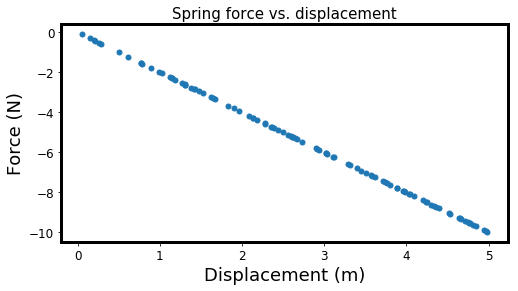

In [3]:
def spring_F(k, n_samples=100,x_max = 5):
    x_list = np.random.uniform(0,x_max,n_samples)
    return x_list.reshape(n_samples,1) , -k*np.abs( x_list ).reshape(n_samples,1)

x_list , spring_force_list = spring_F(2,)
x_label = 'Displacement (m)'
y_label = 'Force (N)'
plt_title = 'Spring force vs. displacement'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(x_list , spring_force_list)
plt.show()
# plt.close()

#### Fit

In [4]:
from sklearn.linear_model import LinearRegression

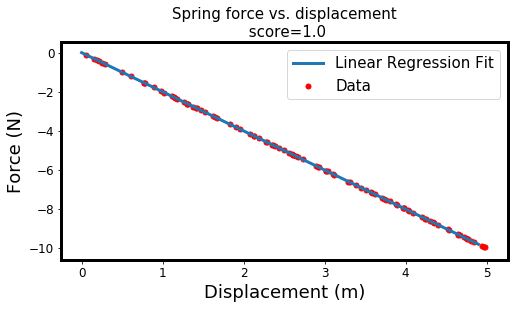

In [5]:
reg = LinearRegression()
reg.fit(x_list, spring_force_list)
x = np.arange(0,5,.1).reshape(50,1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title + 
                     '\n score=' + str( reg.score(x_list, spring_force_list) ) )

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(x_list , spring_force_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()


### Noise

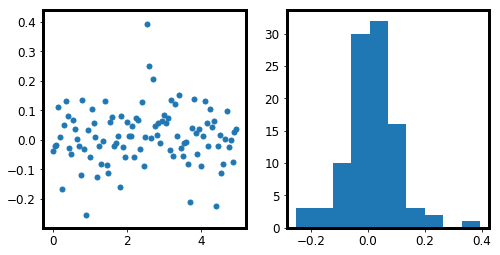

In [6]:
'''
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100
x = np.arange(0,5,5/n_s).reshape(n_s,1)
noise = g_noise(0,.1,len(x)).reshape(n_s,1)

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(x, noise)

ax2.hist(noise)

plt.show()
plt.tight_layout()
plt.close()

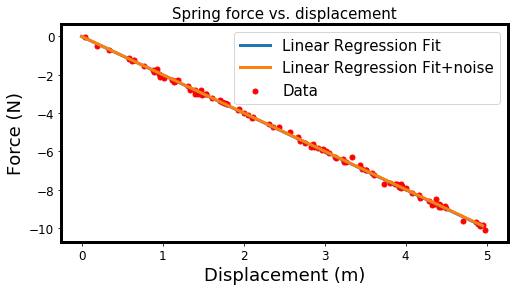

In [7]:
n_s = 100
x_list, noisy_f_list =  spring_F(2,n_samples=n_s)
noisy_f_list += noise

reg2 = LinearRegression()
reg2.fit(x_list, noisy_f_list)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg2.predict( x ) ,label='Linear Regression Fit+noise' )
ax.scatter(x_list , noisy_f_list , color='r',label='Data' )
ax.legend(loc=0)
plt.show()


# plt.plot(x, reg.predict( x ) , color='b')
# plt.plot(x, reg2.predict( x ) , color='g')
# plt.scatter(x_list , f_list, color='r')
# plt.show()
# plt.close()


Is this always the case?
Under what conditions?

### A little bit of non-linearity
What if the data is not at simple as we saw above. What happens then?
Here simulate the position of a particle under acceleration with some initial velocity and some initial position and collect the data of the x(t). 


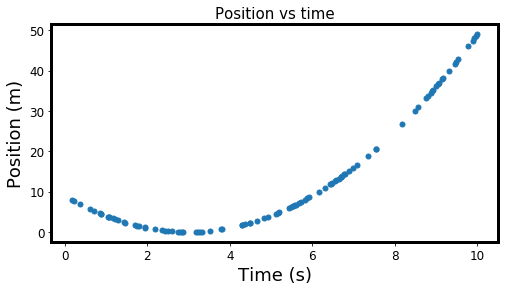

In [8]:
def position(a, v=0, x0=0, n_samples=100, t_max=5):
    t_list = np.random.uniform(0,t_max,n_samples)
    return t_list.reshape(n_samples,1) , (1/2*a*t_list**2 + v*t_list+x0).reshape(n_samples,1)

t_list , pos_list = position(2,v=-6,x0=9, t_max=10)
x_label = 'Time (s)'
y_label = 'Position (m)'
plt_title = 'Position vs time'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(t_list , pos_list)
plt.show()

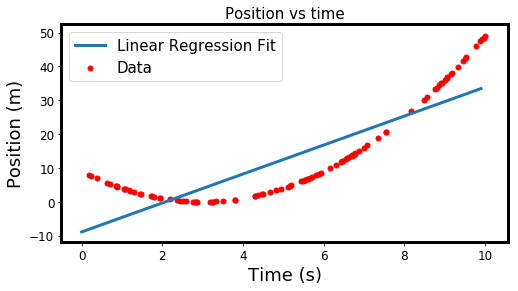

In [9]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

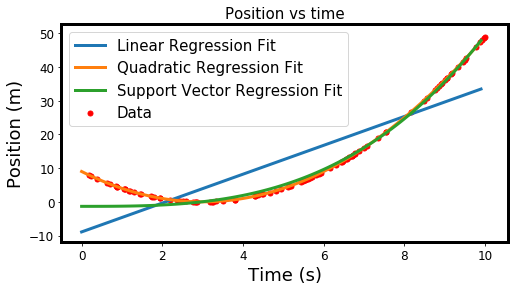

CPU times: user 7.86 s, sys: 40 ms, total: 7.9 s
Wall time: 7.89 s


In [10]:
%%time

reg_nl = LinearRegression()
reg_nl.fit(t_list, pos_list)
x = np.arange(0,10,.1).reshape(100,1)

from sklearn.preprocessing import PolynomialFeatures
polytransform = PolynomialFeatures(degree=3 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform.fit_transform(t_list)      , pos_list)

from sklearn.svm import SVR
svr_nl = SVR(kernel='poly')
svr_nl.fit(t_list, pos_list.reshape(n_s, ) )

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, svr_nl.predict( x ) ,label='Support Vector Regression Fit' )
ax.scatter(t_list , pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

### Noise + complexity
Would the situation be as simple if we had noise on top of a non-linear model?

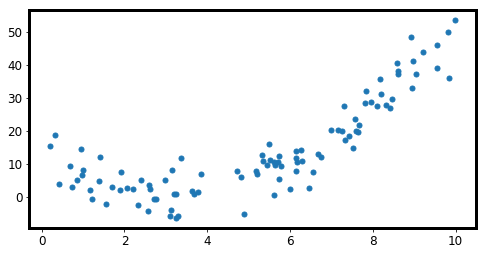

In [12]:
'''
We use the same noise function as before: 
g_noise takes the mean value of the noise, x_0 and 
the variance of the noise, sigma and 
the number of sample points, n_points and 
returns an array of shape (n_points,1)
'''
def g_noise(x0, sigma ,n_points=100):
    return np.random.normal(x0, sigma, size=n_points)


n_s = 100  ## Number of sample points
noise = g_noise(0,5,len(x)).reshape(n_s,1)

'''We generate the data and add the noise to the position measurements. '''
t_list , pos_list = position(2,v=-6,x0=9, t_max=10, n_samples=n_s)
noisy_pos_list = pos_list+noise

plt.scatter(t_list, noisy_pos_list)
plt.show()

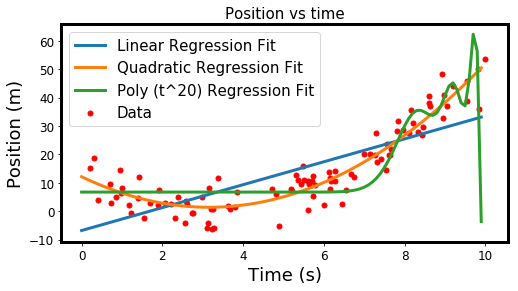

In [13]:
reg_nl = LinearRegression()
reg_nl.fit(t_list, noisy_pos_list)
x = np.arange(0,10,.1).reshape(100,1)

polytransform2 = PolynomialFeatures(degree=2 )
reg_nl2 = LinearRegression()
reg_nl2.fit(       polytransform2.fit_transform(t_list)      , noisy_pos_list)

polytransform20 = PolynomialFeatures(degree=50 )
reg_nl20 = LinearRegression()
reg_nl20.fit(       polytransform20.fit_transform(t_list)      , noisy_pos_list)


fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.plot(x, reg_nl.predict( x ) ,label='Linear Regression Fit' )
ax.plot(x, reg_nl2.predict( polytransform2.fit_transform(x) ) ,label='Quadratic Regression Fit' )
ax.plot(x, reg_nl20.predict( polytransform20.fit_transform(x) ) ,label='Poly (t^20) Regression Fit' )
ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
ax.legend(loc=0)
plt.show()

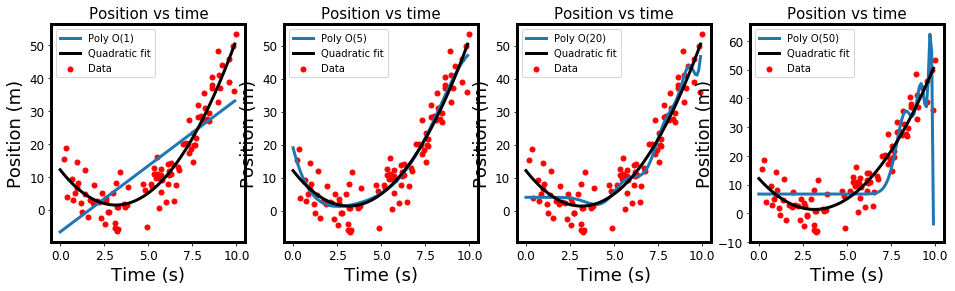

In [14]:
####### Add column to account for different values of sigma
####### Add the information about the score and validation info. 

fig = plt.figure(figsize=(16,4))
degrees = [1, 5, 20, 50]

quad_polytransform = PolynomialFeatures(degree=2 )
reg_quad = LinearRegression()
reg_quad.fit(       quad_polytransform.fit_transform(t_list)      , noisy_pos_list)


for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1, xlabel=x_label, ylabel=y_label, title=plt_title)
    polytransform = PolynomialFeatures(degree = degrees[i] )
    reg = LinearRegression()
    reg.fit(  polytransform.fit_transform(t_list)      , noisy_pos_list)
    
    ax.scatter(t_list , noisy_pos_list, color='r',label='Data' )
    ax.plot(x, reg.predict( polytransform.fit_transform(x) ) ,label='Poly O('+str(degrees[i])+')' )
    ax.plot(x, reg_quad.predict( polytransform2.fit_transform(x) ) ,label='Quadratic fit', color='black')
    ax.legend(loc=0, fontsize = 10)

plt.tight_layout
plt.show()

## Exercises
- Repeat this with more points? What do you see?
- What happens if you do this with the noise itself?
- Find a fit for the data from the radiation from Sun. Try a couple of different degrees for the polynomial.

## Sun

In [15]:
## This data is collected from https://www.pveducation.org/pvcdrom/appendices/standard-solar-spectra
data = pd.read_excel('https://www.pveducation.org/sites/default/files/PVCDROM/Appendices/AM0AM1_5.xls', header=1)
data.head()

,Wavelength (nm),Extraterrestrial W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1,Unnamed: 4,Wavelength (nm).1,W*m-2*nm-1
0,280.0,0.082,4.730900e-23,2.536100e-26,NaN,119.5,0.000062
1,280.5,0.099,1.230700e-21,1.091700e-24,NaN,120.5,0.000561
2,281.0,0.150,5.689500e-21,6.125300e-24,NaN,121.5,0.004901
3,281.5,0.212,1.566200e-19,2.747900e-22,NaN,122.5,0.001184
4,282.0,0.267,1.194600e-18,2.834600e-21,NaN,123.5,0.000048


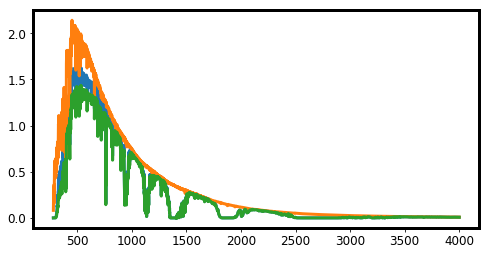

In [16]:
plt.plot(data['Wavelength (nm)'], data['Global tilt  W*m-2*nm-1'])
plt.plot(data['Wavelength (nm)'], data['Extraterrestrial W*m-2*nm-1'])
plt.plot(data['Wavelength (nm)'], data['Direct+circumsolar W*m-2*nm-1'])
plt.show()